In [12]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import warnings

import geopandas as gpd
import libpysal
import mapclassify
import matplotlib.pyplot as plt
import momepy as mm

import scipy as sp
import seaborn as sns

from tqdm.auto import tqdm
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy

C:\Users\liche\anaconda3\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-12-5d0e6c2d292a>:6: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (callin

In [34]:
data = pd.read_csv("files/attr/raw_dataset.csv")

In [35]:
data.columns

Index(['Unnamed: 0', 'property_area', 'building_area', 'height',
       'TotalFloor_sum', 'floor_area', 'sdbAre', 'sdbVol', 'sdbPer', 'sdbCoA',
       'ssbFoF', 'ssbVFR', 'ssbCCo', 'ssbCor', 'ssbSqu', 'ssbERI', 'ssbElo',
       'ssbCCM', 'ssbCCD', 'stbOri', 'stbCeA', 'mtbSWR', 'mtbAli', 'mtbNDi',
       'libNCo', 'ldbPWL', 'ltcBuA', 'stbSAl', 'stcOri', 'sdcLAL', 'sdcAre',
       'sscCCo', 'sscERI', 'mtcWNe', 'mdcAre', 'licGDe', 'ltcWRB', 'sicCAR',
       'sicFAR', 'stcSAl', 'ldkAre', 'ldkPer', 'lskCCo', 'lskERI', 'lskCWA',
       'ltkOri', 'ltkWNB', 'likWBB', 'sdsLen', 'sdsSPW', 'sdsSPH', 'sdsSPR',
       'sdsSPO', 'sdsSWD', 'sdsSHD', 'sdsAre', 'sisBpM', 'misRea', 'mdsAre',
       'mm_len', 'cdsbool', 'node_start', 'node_end', 'ldsMSL', 'ldsRea',
       'mtdDeg', 'lcdMes', 'linP3W', 'linP4W', 'linPDE', 'lcnClo', 'ldsCDL',
       'xcnSCl', 'mtdMDi', 'lddNDe', 'linWID', 'lddRea', 'lddARe', 'sddAre',
       'midRea', 'midAre', 'EUI'],
      dtype='object')

In [37]:
pa = data.drop(columns=
              ["Unnamed: 0"]
              )

In [38]:
pa

,property_area,building_area,height,TotalFloor_sum,floor_area,sdbAre,sdbVol,sdbPer,sdbCoA,ssbFoF,...,xcnSCl,mtdMDi,lddNDe,linWID,lddRea,lddARe,sddAre,midRea,midAre,EUI
0,38.0,2107.8,11.6,410.77,125.881046,37.981350,440.583660,25.288062,0.0,5.722237,...,0.000000,131.965738,0.007578,0.007578,53,1.886736e+04,12365.609653,53,18867.364812,141.506196
1,38.3,157.4,9.6,235.45,104.998629,38.280750,367.495200,24.914262,0.0,5.407904,...,0.000000,41.767837,0.029615,0.009872,32,1.197997e+05,21970.262130,25,21970.262130,132.684859
2,40.6,40.6,9.6,113.00,111.268389,40.566600,389.439360,26.082406,0.0,5.455945,...,0.000000,29.338681,0.012960,0.011108,208,9.430136e+04,50535.247414,72,62273.747216,94.000000
3,37.7,184.0,9.1,268.00,98.099040,37.730400,343.346640,25.078541,0.0,5.423798,...,0.000000,774.410955,0.003962,0.006509,132,7.640135e+04,35153.408587,70,38779.991458,107.246269
4,49.8,407.8,13.1,473.88,186.286117,49.771100,652.001410,28.454579,0.0,5.619373,...,0.000000,91.579304,0.010428,0.015642,39,3.840424e+04,10601.595086,28,11926.666581,141.577699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13005,283.7,3166.3,17.1,813.00,1386.314344,283.748550,4852.100205,81.674782,0.0,5.863040,...,0.033333,82.756248,0.002225,0.007929,927,1.013224e+06,154047.180780,410,433135.858556,277.328413
13006,141.0,362.0,3.0,121.00,120.829800,140.968100,422.904300,59.120385,0.0,5.650000,...,0.000000,62.838853,0.031827,0.000000,55,5.995301e+04,59953.012016,55,59953.012016,54.743802
13007,47.1,47.1,10.5,76.00,141.320100,47.106700,494.620350,29.290903,0.0,5.670643,...,0.000000,42.721634,0.046815,0.000000,9,5.960348e+03,5960.347690,9,5960.347690,58.000000
13008,97.5,823.4,10.7,78.60,298.046027,97.491691,1043.161095,50.313069,0.0,6.181796,...,0.000000,57.946480,0.034515,0.000000,203,7.665604e+04,19179.938328,203,76656.037279,334.000000


In [43]:
x = pa.values
scaler = preprocessing.StandardScaler()
cols = list(pa.columns)
pa[cols] = scaler.fit_transform(pa[cols])

In [64]:
y = data["EUI"].values
scaler = preprocessing.StandardScaler()
cols = list(["EUI"])
eui = scaler.fit_transform(data[cols])

In [65]:
eui

array([[-0.04078851],
       [-0.16473568],
       [-0.70829036],
       ...,
       [-1.21412052],
       [ 2.66391071],
       [ 0.89406526]])

In [44]:
pa

,property_area,building_area,height,TotalFloor_sum,floor_area,sdbAre,sdbVol,sdbPer,sdbCoA,ssbFoF,...,xcnSCl,mtdMDi,lddNDe,linWID,lddRea,lddARe,sddAre,midRea,midAre,EUI
0,-0.388048,0.655231,-0.040547,-0.170919,-0.199758,-0.388089,-0.199758,-0.534065,-0.038657,-0.264236,...,-0.252721,0.161096,-0.329000,-0.380027,-0.610350,-0.629053,-0.476143,-0.432656,-0.594408,-0.040789
1,-0.387378,-0.759693,-0.312311,-0.248280,-0.203895,-0.387421,-0.203895,-0.539342,-0.038657,-0.668532,...,-0.252721,-0.552738,0.232420,-0.233054,-0.719997,-0.105915,-0.226094,-0.772294,-0.554770,-0.164736
2,-0.382245,-0.844426,-0.312311,-0.302311,-0.202653,-0.382319,-0.202653,-0.522851,-0.038657,-0.606741,...,-0.252721,-0.651104,-0.191889,-0.153822,0.198946,-0.238075,0.517573,-0.202187,-0.039909,-0.708290
3,-0.388717,-0.740396,-0.380252,-0.233917,-0.205262,-0.388649,-0.205262,-0.537023,-0.038657,-0.648089,...,-0.252721,5.245467,-0.421118,-0.448519,-0.197870,-0.330851,0.117119,-0.226447,-0.340032,-0.522169
4,-0.361712,-0.578040,0.163276,-0.143071,-0.187791,-0.361776,-0.187791,-0.489363,-0.038657,-0.396540,...,-0.252721,-0.158526,-0.256392,0.136628,-0.683448,-0.527792,-0.522068,-0.735905,-0.683073,-0.039784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13005,0.160317,1.423124,0.706803,0.006567,0.049957,0.160426,0.049957,0.261946,-0.038657,-0.083134,...,0.715334,-0.228352,-0.465375,-0.357541,3.953038,4.524751,3.212422,3.897735,4.697704,1.867627
13006,-0.158168,-0.611265,-1.209132,-0.298781,-0.200759,-0.158238,-0.200759,-0.056454,-0.038657,-0.357146,...,-0.252721,-0.385980,0.288781,-0.865527,-0.599908,-0.416104,0.762756,-0.408396,-0.069555,-1.259873
13007,-0.367738,-0.839711,-0.190018,-0.318638,-0.196699,-0.367723,-0.196699,-0.477557,-0.038657,-0.330595,...,-0.252721,-0.545190,0.670593,-0.865527,-0.840086,-0.695951,-0.642899,-0.966373,-0.759290,-1.214121
13008,-0.255253,-0.276541,-0.162841,-0.317491,-0.165649,-0.255271,-0.165649,-0.180787,-0.038657,0.326850,...,-0.252721,-0.424699,0.357239,-0.865527,0.172840,-0.329531,-0.298738,1.386836,0.143819,2.663911


In [45]:
pi = pa.drop(columns=["EUI"])

In [46]:
bic = pd.DataFrame(columns=['n', 'bic', 'run'])
ix = 0

n_components_range = range(2, 10) # specify range you want to assess. 2-8 is sensible for the sample, not the whole city
gmmruns = 1  # specify how many times should each option be tried (more better, but takes a long time)

In [47]:
for n_components in n_components_range:
    for i in range(gmmruns):
        gmm = GaussianMixture(n_components=n_components, covariance_type="full", max_iter=200, n_init=1, verbose=1)
        fitted = gmm.fit(pi)
        bicnum = gmm.bic(pi)
        bic.loc[ix] = [n_components, bicnum, i]
        ix += 1

        print(n_components, i, "BIC:", bicnum)

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True
2 0 BIC: 1003713.2604265236
Initialization 0
  Iteration 10
Initialization converged: True
3 0 BIC: 801213.9608693102
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
Initialization converged: True
4 0 BIC: 751981.3728706224
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True
5 0 BIC: 480853.73301828606
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True
6 0 BIC: 561152.5437733633
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
Initialization converged: True
7 0 BIC: 345691.67185778054
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Ite

<AxesSubplot:xlabel='n', ylabel='bic'>

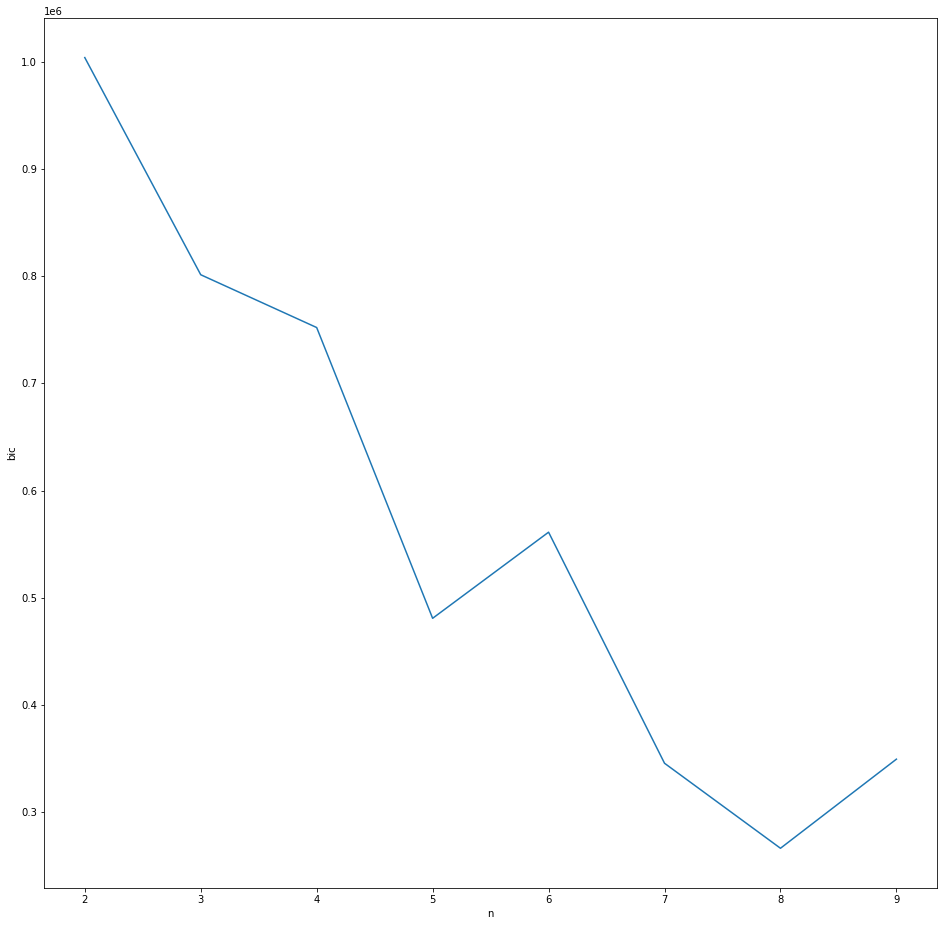

In [48]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.lineplot(ax=ax, x='n', y='bic', data=bic)
# plt.savefig('../files/complete_BIC.pdf')

In [ ]:
n = 9  # illustrative - always base the number on a reasonable estimation of the optimal number of components
n_init = 5  # more initialization, more stable clustering gets

gmm = GaussianMixture(n_components=n, covariance_type="full", max_iter=200, n_init=n_init, verbose=1)
fitted = gmm.fit(pi)

Text(0, 0.5, 'cumulative explained variance')

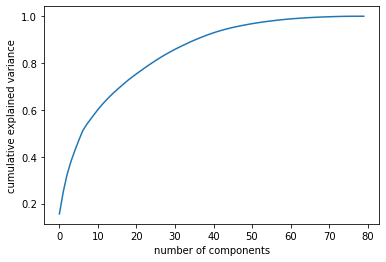

In [49]:
pca = PCA().fit(pi)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [27]:


# Initialize PCA
pca = PCA(n_components=45)  # Specify the number of components you want

# Fit the data
pca.fit(pi)

# Transform the data
transformed_data = pca.transform(pi)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print("Transformed data:")
print(transformed_data)
print("Explained Variance Ratio:")
print(explained_variance_ratio)

Transformed data:
[[-2.43644531 -2.04678503 -0.99826097 ... -0.17473911 -0.33919125
  -0.59106118]
 [-1.75654834 -1.47682    -0.71887665 ... -0.36575688  0.3111265
  -0.72679795]
 [-0.67482917 -1.19928129 -4.66827889 ... -0.21669601  0.28384941
   0.36759615]
 ...
 [ 0.25752546 -2.77031866 -1.28953032 ... -0.78828232  0.55134952
  -0.08177654]
 [-0.95835868  0.71275769 -0.1258134  ... -0.10227171 -0.5969053
   0.33708303]
 [ 4.17058106 -0.3185419   4.47785957 ...  2.17066473  0.43090222
   1.85385676]]
Explained Variance Ratio:
[0.15210795 0.09595914 0.07475692 0.05595644 0.04669855 0.04301719
 0.04076025 0.02694888 0.02239816 0.02215077 0.02162676 0.01979922
 0.01790766 0.01722155 0.01613233 0.01505708 0.01447088 0.01430018
 0.01393853 0.01288117 0.0121641  0.01193305 0.01190041 0.01151971
 0.0110857  0.01088513 0.01048791 0.01023046 0.00938766 0.00928171
 0.00880035 0.00838306 0.00806795 0.00779788 0.00769794 0.00735422
 0.00688886 0.00682662 0.00642796 0.00592396 0.00583172 0.004857

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have your dataset and target array
X = pi  # Your dataset
y = eui  # Your target array

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)

# Train the model
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = gb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


C:\Users\liche\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean Squared Error: 0.7129615726367388


In [70]:
gb_regressor.score(X_test, y_test)

0.20804310193122066

In [67]:
predictions

array([-0.32187383, -0.17113928, -0.00897615, ...,  0.07739341,
        0.03781826, -0.05332465])

In [68]:
y_test

array([[-0.91839429],
       [-0.16443735],
       [-0.10443888],
       ...,
       [-0.71508961],
       [ 1.43624759],
       [-1.4063739 ]])

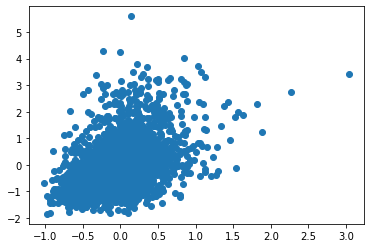

In [69]:
plt.scatter(predictions, y_test)

In [74]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load the Boston housing dataset (example dataset)
X = pi  # Your dataset
y = eui  # Your target array

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_reg.fit(X_train, y_train)

# Make predictions
predictions = knn_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.7901915460804374


In [72]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the Boston housing dataset (example dataset)

X = pi  # Your dataset
y = eui  # Your target array

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the MLP Regressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the model
mlp_reg.fit(X_train, y_train)

# Make predictions
predictions = mlp_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


C:\Users\liche\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean Squared Error: 1.1417392336267993


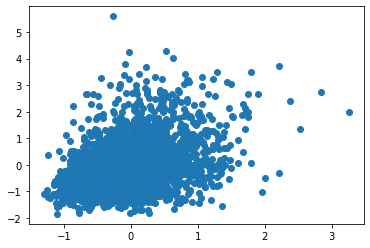

In [75]:
plt.scatter(predictions, y_test)

In [76]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the Boston housing dataset (example dataset)
X = pi  # Your dataset
y = eui  # Your target array
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the SVR
svr = SVR(kernel='rbf')

# Train the model
svr.fit(X_train, y_train)

# Make predictions
predictions = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


C:\Users\liche\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean Squared Error: 0.7534392634850293


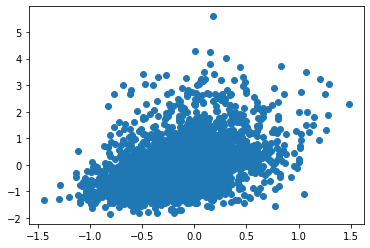

In [77]:
plt.scatter(predictions, y_test)

In [78]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the Boston housing dataset (example dataset)

X = pi  # Your dataset
y = eui  # Your target array

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Make predictions
predictions = rf_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


<ipython-input-78-e279bb181207>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


Mean Squared Error: 0.6744682681428209


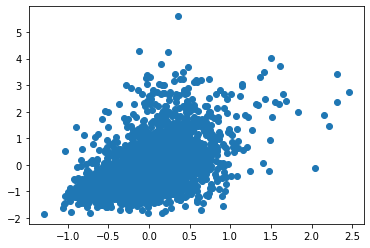

In [79]:
plt.scatter(predictions, y_test)

In [80]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the Boston housing dataset (example dataset)
X = pi  # Your dataset
y = eui  # Your target array
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Lasso regressor
lasso_reg = Lasso(alpha=0.1)

# Train the model
lasso_reg.fit(X_train, y_train)

# Make predictions
predictions = lasso_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.874191791410117


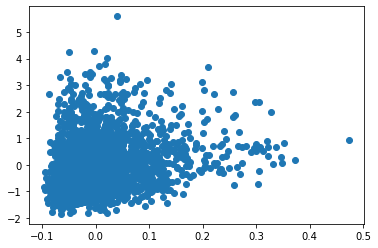

In [81]:
plt.scatter(predictions, y_test)

In [82]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the Boston housing dataset (example dataset)
X = pi  # Your dataset
y = eui  # Your target array

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the ElasticNet regressor
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model
elastic_net.fit(X_train, y_train)

# Make predictions
predictions = elastic_net.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.8434065067378513


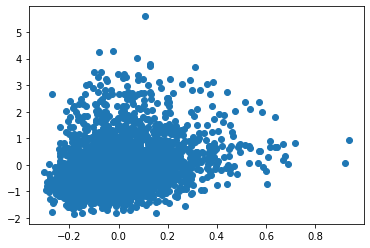

In [83]:
plt.scatter(predictions, y_test)

In [87]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the Boston housing dataset (example dataset)
X = pi  # Your dataset
y = eui  # Your target array

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [4, 5]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
predictions = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Best Model Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\liche\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\liche\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\liche\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\liche\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

Best Model Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Mean Squared Error: 0.786118002371307


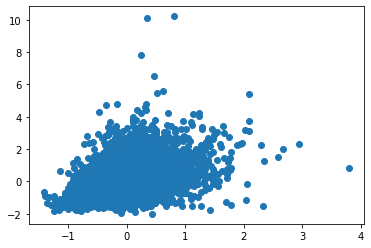

In [88]:
plt.scatter(predictions, y_test)

In [89]:
grid_search.score(X_train, y_train), grid_search.score(X_test, y_test)

(-0.3551003089597176, -0.786118002371307)